# Scrape Dashboard Data for COVID Cases 
## in Pinellas County Schools

In this notebook, we develop tools to scrape and analyze the data contained in Pinellas County School's COVID database. The tools include county wide totals, school by school analyses, and data visualization.

## Setting the constants and loading some packages
Below, two url's are loaded as strings. The first url, `URL`, is the PCSB web page containing COVID case numbers for each school each day they are reported. This web page provides some searchability of the COVID results during the 2021-2022 school year in Pinellas County Schools. We do not need the searchability functionality of the webpage; we need the data contained in the database so that we can analyze and visualize it with pandas and matplotlib. To get the whole database, only only needs to click on the `Submit` button without any filters applied. Then the web page dynamically displays a table splayed over several pages. 


In [1]:
#Load packages
import pandas as pd
import matplotlib.pyplot as plt
import PCS_COVID_ScraPy as PCS
from datetime import date


#Set URL
URL = 'https://www.pcsb.org/covid19cases'
URL_2020_2021 = 'https://www.pcsb.org/Page/34025'

#Set driver path !!!Important - every user will have a different driver path! See readme.md for more info!
driver_path = "C:/webdrivers/chromedriver.exe"



^^^^^^^^^^^^PCS_COVID_ScraPy is now loaded! Happy data analysis!^^^^^^^^^^^^^


## Scraping the table into a df

Once the variables are set above, we can run the wrapper function. This function is likely to throw errors such as "StaleElement" or "Driver not Found" until you:
  1. Get the timer set appropriately for your internet connection and page load times, and 
  2. Get consistent behavior from the web browser you are driving. 

In the case of those types of errors, close the browser that opens when this operates and re-run this cell. You may get several consecutive errors, but it will eventually work. You can also try to re-run the first cell and increase the delay time.

This routine will give status updates of how many pages it is scraping and how many it has scraped.

In [ ]:
data_dict, data_df = PCS.Scrape_data(URL, driver_path, 2)

## Data Analysis

From this point on, we employ pandas and matplotlib to analyze and visualize the data. This notebook allows you to slice the data into various bins, by date, by school, by category, and shows some clever ways to plot the data compared to last year's data. 

In [8]:
#Verify the size the dataframe. There are approximately 25 rows per page scraped (in most cases). 
print(data_df.columns)
print(data_df.shape)


Index(['Date', 'Locations affected', 'Number of positive employees',
       'Number of positive students'],
      dtype='object')
(359, 4)


In [9]:
#Save the datadump. If you want to save a .csv file, un-comment the last line and run this cell.

today = date.today()
filename = 'data_dump_' + today.strftime("%Y%m%d") +'.csv'
print(filename)
#Uncomment the line below to save the data 
#pd.DataFrame.to_csv(data_df, filename)

data_dump_20210816.csv


In [11]:
#Add column for total cases, calculate grand total.
data_df['Total cases'] = data_df['Number of positive employees'] + data_df['Number of positive students
print(data_df.shape)
print('Total cases in district = ' + str(sum(data_df['Total cases'])))
print(data_df.groupby('Locations affected').sum().sort_values(by='Total cases', ascending=False))

(359, 5)
Total cases in district = 605
                                    Number of positive employees  \
Locations affected                                                 
Walter Pownall Service Center                                 22   
Administration Building                                       22   
Dunedin High School                                            5   
Palm Harbor University High School                             1   
Carwise Middle School                                          6   
...                                                          ...   
Seminole Elementary School                                     1   
San Jose Elementary School                                     0   
Pinellas Gulf Coast Academy                                    1   
Pinellas Secondary School                                      0   
Academie Da Vinci                                              0   

                                    Number of positive students  Total cases

In [14]:
#Group by day and compare daily totals

daily_totals = data_df.groupby('Date').sum('Total Cases')
print(daily_totals)

            Number of positive employees  Number of positive students  \
Date                                                                    
2021/07/12                             9                            4   
2021/07/19                            10                            8   
2021/07/26                            24                           12   
2021/08/01                            27                            7   
2021/08/09                           145                           58   
2021/08/10                            23                            4   
2021/08/11                            37                           72   
2021/08/12                            19                           76   
2021/08/13                            22                           48   

            Total cases  
Date                     
2021/07/12           13  
2021/07/19           18  
2021/07/26           36  
2021/08/01           34  
2021/08/09          203  
2021/08/10    

## Focus on Midtown Academy (K-5, southside) vs. Dunedin (K-5, north county)

To compare two schools, we select the text in the their names and use pandas to filter the rest of the data. For each one, a time series can be made for both students and employees who have tests positive for COVID 19 during this school year. These schools allow us to use geography as a proxy for how many people may become sick with COVID due to opening schools with no mask mandate and the highly contagious delta variant of COVID causing record daily positive cases and hospitalization in the county and across the state. 

      0    1    2        Date Locations affected  \
6   NaN  NaN  NaN  2021/08/11    Midtown Academy   
12  NaN  NaN  NaN  2021/08/09    Midtown Academy   
23  NaN  NaN  NaN  2021/08/01    Midtown Academy   
24  NaN  NaN  NaN  2021/08/01    Midtown Academy   

    Number of positive employees  Number of positive students  Total cases  
6                            0.0                          1.0          NaN  
12                           2.0                          0.0          NaN  
23                           1.0                          0.0          NaN  
24                           1.0                          0.0          NaN  


<AxesSubplot:xlabel='Date'>

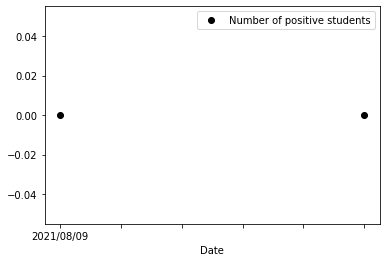

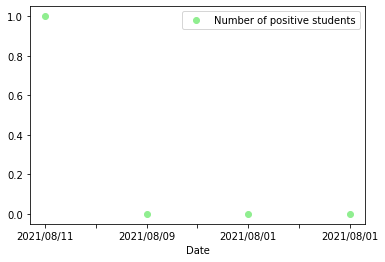

In [9]:
#Use the following two lines to pick data from a single school:
text_in_school1_name = 'Midtown'
school1_df = data_df[data_df['Locations affected'].astype(str).str.contains(text_in_school1_name)]
print(school1_df)

text_in_school2_name = 'Dunedin Elementary'
school2_df = data_df[data_df['Locations affected'].astype(str).str.contains(text_in_school2_name)]

school2_df.plot('Date', 'Number of positive students', color='k', marker='o', linestyle=" ")
school1_df.plot('Date', 'Number of positive students', color='lightgreen', marker='o', linestyle=" ")